In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Model Creation**

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Advertising.csv")
df = df.iloc[:, 1:]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


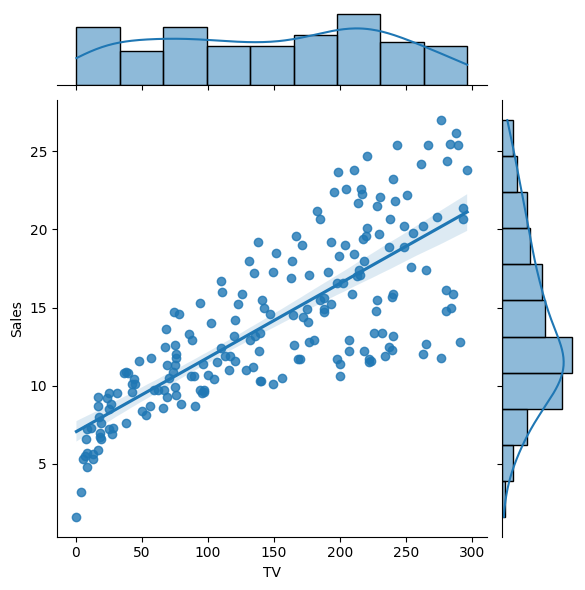

In [6]:
import seaborn as sns
sns.jointplot(x="TV",y="Sales",data=df, kind="reg")

In [7]:
X = df[["TV"]]
y = df[["Sales"]]

In [8]:
# Creating a model object from the LinearRegression class
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [9]:
# start the model training
model = reg.fit(X,y)

In [10]:
model

LinearRegression()

In [11]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

In [12]:
# B₀, constant
model.intercept_

array([7.03259355])

In [ ]:
# B₁, slop
model.coef_

array([[0.04753664]])

In [13]:
# R^2 (61% of the dependent variable can be explained by the independent variables)
model.score(X,y)

0.611875050850071

# **Prediction**

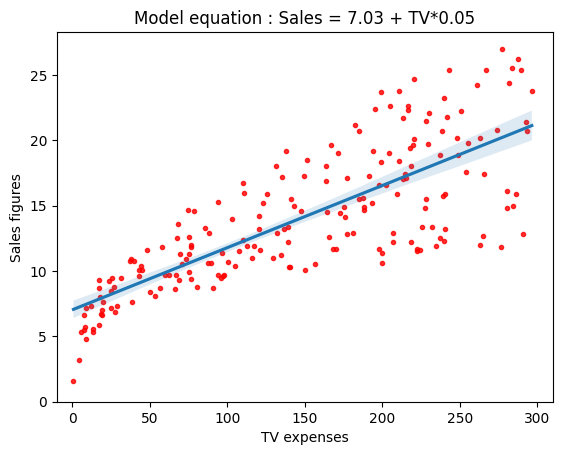

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.regplot(x=df["TV"], y=df["Sales"], ci=95, scatter_kws={"color":"r","s":9})
graph.set_title("Model equation : Sales = 7.03 + TV*0.05")
graph.set_ylabel("Sales figures")
graph.set_xlabel("TV expenses")
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

# ci, confidence interval

In [25]:
model.intercept_ + model.coef_*200

array([[16.53992164]])

In [26]:
model.predict([[200]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16.53992164]])

In [28]:
new_data = [[60],[100],[400]]
model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 9.88479198],
       [11.78625759],
       [26.04724972]])

#**MSE (Mean Squared Error) ,RMSE (Root Mean Squared Error)**

* MSE (Mean Squared Error): MSE is a statistic that measures the average of the
squares of the errors between predicted values and actual values, indicating the amount of error in a model.

* RMSE (Root Mean Squared Error): RMSE is the square root of MSE, providing an error measurement expressed in the same units as the original data and indicating how accurately the model predicts outcomes.

In [29]:
# actual values of y (dependent variable)
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [33]:
# predicted values of y
model.predict(X)[0:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

In [34]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y,model.predict(X))

10.512652915656757

In [35]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y,model.predict(X)))

3.2423221486546887